2022-06-25 09:35:44,670 - Extracting Terms...
2022-06-25 09:35:45,013 - loaded 'en_core_web_sm' spaCy language pipeline
100%|██████████████████████████████████████████████████████████████| 2990/2990 [00:20<00:00, 143.04it/s]
2022-06-25 09:36:06,272 - Extracting Docs Embeddings...
100%|███████████████████████████████████████████████████████████████| 2990/2990 [01:14<00:00, 40.04it/s]


UMAP(n_components=5, random_state=42, verbose=True)
Sat Jun 25 09:37:22 2022 Construct fuzzy simplicial set
Sat Jun 25 09:37:25 2022 Finding Nearest Neighbors
Sat Jun 25 09:37:27 2022 Finished Nearest Neighbor Search
Sat Jun 25 09:37:28 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 09:37:33 2022 Finished embedding
UMAP(random_state=42, verbose=True)
Sat Jun 25 09:37:34 2022 Construct fuzzy simplicial set
Sat Jun 25 09:37:37 2022 Finding Nearest Neighbors
Sat Jun 25 09:37:37 2022 Finished Nearest Neighbor Search
Sat Jun 25 09:37:37 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 09:37:42 2022 Finished embedding


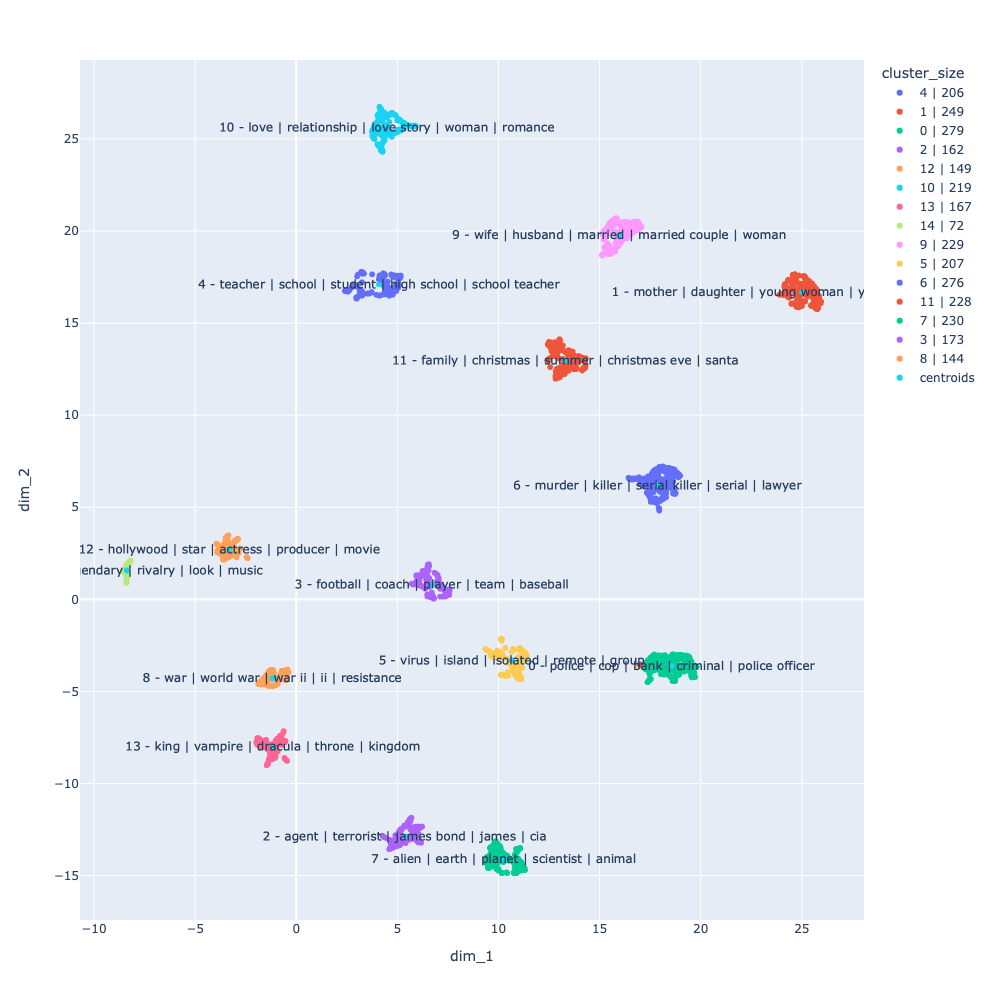

In [1]:
from bunkatopics import BunkaTopics
import pandas as pd

data = pd.read_csv("data/imdb.csv", index_col=[0])
data = data.sample(3000, random_state=42)


model = BunkaTopics(
    data,  # dataFrame
    text_var="description",  # Text Columns
    index_var="imdb",  # Index Column (Mandatory)
    extract_terms=True,  # extract Terms ?
    terms_embeddings=False,  # extract terms Embeddings?
    docs_embeddings=True,  # extract Docs Embeddings?
    embeddings_model="distiluse-base-multilingual-cased-v1",  # Chose an embeddings Model
    multiprocessing=True,  # Multiprocessing of Embeddings
    language="en",  # Chose between English "en" and French "fr"
    sample_size_terms=len(data),
    terms_limit=10000,  # Top Terms to Output
    terms_ents=True,  # Extract entities
    terms_ngrams=(1, 2),  # Chose Ngrams to extract
    terms_ncs=True,  # Extract Noun Chunks
    terms_include_pos=["NOUN", "PROPN", "ADJ"],  # Include Part-of-Speech
    terms_include_types=["PERSON", "ORG"],
)  # Include Entity Types

# Extract the topics

topics = model.get_clusters(
    topic_number=15,  # Number of Topics
    top_terms_included=1000,  # Compute the specific terms from the top n terms
    top_terms=5,  # Most specific Terms to describe the topics
    term_type="lemma",  # Use "lemma" of "text"
    ngrams=[1, 2],
)  # N-grams for Topic Representation

# Visualize the clusters. It is adviced to choose less that 5 terms - top_terms = 5 - to avoid overchanging the Figure

fig = model.visualize_clusters(search=None, width=1000, height=1000)
fig.show()
